In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [5]:
crop_r = pd.read_csv('/home/miracle/Documents/crop recommendation/Crop_recommendation.csv')
crop_r.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
print(crop_r.shape, crop_r.ndim, crop_r.size) # shape deals with numbers of rows and columns

(2200, 8) 2 17600


In [7]:
crop_r.tail(3)

,N,P,K,temperature,humidity,ph,rainfall,label
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
crop_r.info() # To know the number of row and column togther with thier null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
crop_r.describe() # To know the statistics  of the dataset

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
crop_r.isnull().sum() # To count the number of null values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
crop_r['label'].value_counts()

mothbeans      100
apple          100
pigeonpeas     100
muskmelon      100
papaya         100
rice           100
jute           100
mango          100
coconut        100
mungbean       100
grapes         100
blackgram      100
watermelon     100
lentil         100
banana         100
pomegranate    100
orange         100
chickpea       100
cotton         100
coffee         100
maize          100
kidneybeans    100
Name: label, dtype: int64

In [12]:
crop_r.size

17600

In [13]:
crop_r.groupby('label').mean() # mean of the label values

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [14]:
crop_r['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Coverting categorical value into neumerical value

In [15]:
 #Computer understands neumerical values only unlike humans that understands both neum and cate values
# Method 1. LabelEncoding from Sklearn
#from sklearn.preprocessing import LabelEncoder
#le= LabelEncoder()
#outcome = le.fit_transform(crop_redm['label']) # using fit_transform function
#outcome
#crop_redm.drop('label', axis=1, inplace= True)
#crop_redm["label"]= outcome

# Method 2 Using unique()
#d = {value:index for index, value in enumerate (crop_r['label'].unique()) }
#d
#crop_r['outcome']=crop_r['label'].map(d)
#crop_r
#cropR.drop('label', axis=1, inplace = True)


In [16]:
# Separating the feature and target varibles
#X = crop_r.drop(['label'], axis=1)
#X = crop_r.iloc [:,1:8] 
features= crop_r[['N','P','K','temperature','humidity','ph','rainfall']]
target=crop_r['label']


In [17]:
# Spliting them into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(features,target, test_size=0.2, stratify=target, random_state=2)
print (features.shape, X_train.shape, X_test.shape)
print (features.size, X_train.size, X_test.size)
print (target.shape, Y_train.shape, Y_test.shape)

(2200, 7) (1760, 7) (440, 7)
15400 12320 3080
(2200,) (1760,) (440,)


In [18]:
print(Y_train)

1432    muskmelon
1978       cotton
504     mothbeans
1459    muskmelon
843        lentil
          ...    
682      mungbean
223      chickpea
1114        mango
1155        mango
1687       orange
Name: label, Length: 1760, dtype: object


In [19]:
# Intializing empty lists to append models accuracy and their corresponding name
acc = []
model = []

In [17]:
crop_r.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

# Support vector machine model

In [18]:
from sklearn import svm
Classifier = svm.SVC()
Classifier.fit(X_train,Y_train)


SVC()

In [19]:
# Training acccuracy score
X_train_pred= Classifier.predict(X_train)
X_train_acc= accuracy_score(X_train_pred, Y_train)
X_train_acc
#print(classification_report(X_train_pred, Y_train))
#print(confusion_matrix(X_train_pred, Y_train))

0.9767045454545454

In [20]:
# Testing acccuracy score
X_test_pred= Classifier.predict(X_test)
X_test_accsvm= accuracy_score(X_test_pred, Y_test)
X_test_accsvm
acc.append(X_test_accsvm)
model.append('SVM')
print("Support vector machine's Accuracy is:",X_test_accsvm * 100)
print( classification_report(X_test_pred, Y_test))
print(confusion_matrix(X_test_pred, Y_test))

Support vector machine's Accuracy is: 98.86363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      0.95      0.98        21
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.83      0.91        24
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.97        19
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00  

In [21]:
# Cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(Classifier, features, target, cv=5)
score

array([0.98409091, 0.97954545, 0.97954545, 0.97272727, 0.975     ])

In [22]:
# Testing our model 
input_data=(78 ,42 ,42 ,20.130175 ,81.604873 ,7.628473 ,262.717340) # input data
input_array = np.asarray(input_data) # convert the input data as an array
input_reshape = input_array.reshape(1,-1) #Reshape the input data into one dimension
prediction = Classifier.predict(input_reshape) 
prediction


/home/miracle/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['rice'], dtype=object)

# Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
DecisionT= DecisionTreeClassifier()
DecisionT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [24]:
# Training accuracy
X_train_pred= DecisionT.predict(X_train)
X_train_acc= accuracy_score(X_train_pred, Y_train)
X_train_acc

1.0

In [25]:
# Testing accuracy
X_test_pred= DecisionT.predict(X_test)
X_test_accDT= accuracy_score(X_test_pred, Y_test)
X_test_accDT
acc.append(X_test_accDT)
model.append('Decision Tree')
print('The decision tree accuracy is:', X_test_accDT*100)
#print(classification_report(X_test_pred, Y_test))
#print(confusion_matrix(X_test_pred, Y_test))

The decision tree accuracy is: 99.31818181818181


In [26]:
score = cross_val_score(DecisionT, features, target, cv=5)
score

array([0.99090909, 0.98409091, 0.98863636, 0.98636364, 0.98636364])

# Knearest Neighbor Calssifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
Kneighbor = KNeighborsClassifier()
Kneighbor.fit(X_train,Y_train)

KNeighborsClassifier()

In [28]:

# Training accuracy
X_train_pred= Kneighbor.predict(X_train)
X_train_acc= accuracy_score(X_train_pred, Y_train)
X_train_acc

0.9857954545454546

In [29]:
# Testing accuracy
X_test_pred= Kneighbor.predict(X_test)
X_test_accKn= accuracy_score(X_test_pred, Y_test)
X_test_accKn
acc.append(X_test_accKn)
model.append('Knearest neigbor')
print ('The accuracy of Kneighbor is:', X_test_accKn*100)
#print(classification_report(X_test_pred, Y_test))
#print(confusion_matrix(X_test_pred, Y_test))
print(cross_val_score (Kneighbor,features, target, cv=5))

The accuracy of Kneighbor is: 98.18181818181819
[0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [31]:
# Training Accuracy
X_train_pred = RF.predict(X_train)
X_train_accRF=accuracy_score(X_train_pred, Y_train)
X_train_accRF

1.0

In [32]:
# Testing Accuracy
X_test_pred = RF.predict(X_test)
X_test_accRF=accuracy_score(Y_test, X_test_pred)
X_test_accRF
acc.append(X_test_accRF)
model.append('Random Forest')
print('The random forest accuracy is:', X_test_accRF *100)
#print(classification_report(Y_test, X_test_pred))
#print(confusion_matrix(Y_test, X_test_pred))
print(cross_val_score(RF, features,target,cv=5))

The random forest accuracy is: 99.54545454545455
[0.99545455 0.99318182 0.99545455 0.99318182 0.98636364]


# Gradient Boosting Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
GBC= GradientBoostingClassifier()
GBC.fit(X_train,Y_train)

GradientBoostingClassifier()

In [34]:
# Training Accuracy
X_train_pred= GBC.predict(X_train)
X_train_accGBC= accuracy_score(X_train_pred, Y_train)
X_train_accGBC

1.0

In [35]:
# Testing Accuracy
X_test_pred= GBC.predict(X_test)
X_test_accGBC= accuracy_score(X_test_pred, Y_test)
X_test_accGBC
acc.append(X_test_accGBC)
model.append('Gradient Boosting')
print('The gradient boosting accuracy is:',X_test_accGBC*100)
#print(cross_val_score(GBC,features,target,cv=5))

The gradient boosting accuracy is: 99.0909090909091


In [36]:
import xgboost as xgb
XGB=xgb.XGBClassifier()
XGB.fit(X_train,Y_train)

/home/miracle/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:22:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
# Training Accuracy
X_train_pred= XGB.predict(X_train)
X_train_accXGB= accuracy_score(X_train_pred, Y_train)
X_train_accXGB

1.0

In [38]:
# Testing Accuracy
X_test_pred= XGB.predict(X_test)
X_test_accXGB= accuracy_score(X_test_pred, Y_test)
X_test_accXGB
acc.append(X_test_accXGB)
model.append(' Extreme Gradient Boosting')
print('The gradient extreme boosting accuracy is:',X_test_accXGB*100)
#print(cross_val_score(XGB,features,target,cv=5))
#print(confusion_matrix(X_test_pred, Y_test))

The gradient extreme boosting accuracy is: 98.86363636363636


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
LogR= LogisticRegression()
LogR.fit(X_train,Y_train)

/home/miracle/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Training Accuracy
X_train_pred= LogR.predict(X_train)
X_train_accLogR= accuracy_score(X_train_pred, Y_train)
X_train_accLogR

0.9710227272727273

In [41]:
#Testing Accuracy
X_test_pred= LogR.predict(X_test)
X_test_accLogR= accuracy_score(X_test_pred, Y_test)
X_test_accLogR
acc.append(X_test_accLogR)
model.append(' Logistic Regression')
print('The logistic regression accuracy is:',X_test_accLogR*100)
#print(cross_val_score(XGB,features,target,cv=5))
#print(confusion_matrix(X_test_pred, Y_test))
#print(cross_val_score(LogR,features,target,cv=5))

The logistic regression accuracy is: 96.36363636363636


# Accuracy Comparison

Text(0, 0.5, 'Models')

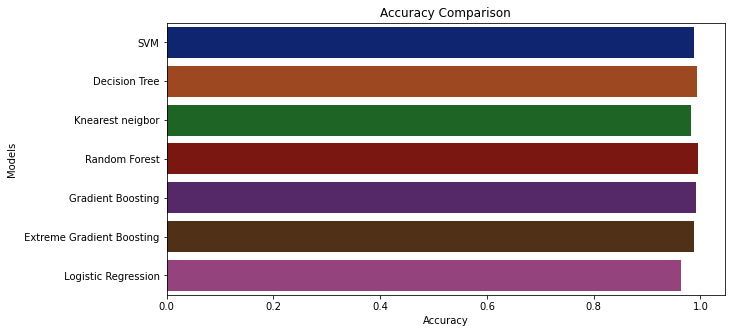

In [42]:
plt.figure(figsize=[10,5])
sns.barplot(x=acc, y= model,palette='dark') # Various palette deep, dark, muted, bright,pastel &colorblind
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Models')

# Saving the Trained Model

In [43]:
import pickle
filename='trained_DecisionT_model.sav'
pickle.dump(DecisionT,open(filename,"wb"))


# Loading the saved model

In [44]:
load_model= pickle.load(open('trained_DecisionT_model.sav', 'rb'))

In [45]:
input_data=(118 ,33 ,30 ,24.131797 ,67.225123 ,6.362608 ,173.322839 )
input_as_arr = np.asarray(input_data) #Coverting the input_data to numpy arrary
input_reshape = input_as_arr.reshape(1,-1)# Reshaping the input data
prediction =load_model.predict(input_reshape)
prediction

/home/miracle/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['coffee'], dtype=object)

In [46]:
#/home/miracle/Documents/crop recommend

In [47]:
print(pickle.format_version)


4.0


In [48]:
pip install pickle-mixin

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install pickle-mixin

Note: you may need to restart the kernel to use updated packages.


In [50]:
import sklearn
print ( sklearn.__version__)


1.0.2


In [59]:
conda update conda

Solving environment: done

## Package Plan ##

  environment location: /home/miracle/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2022.05  |           py38_0           7 KB
    aiohttp-3.8.1              |   py38h7f8727e_1         525 KB
    aiosignal-1.2.0            |     pyhd3eb1b0_0          12 KB
    anaconda-client-1.11.0     |   py38h06a4308_0         149 KB
    anaconda-project-0.11.1    |   py38h06a4308_0         496 KB
    anyio-3.5.0                |   py38h06a4308_0         165 KB
    argon2-cffi-21.3.0         |     pyhd3eb1b0_0          15 KB
    argon2-cffi-bindings-21.2.0|   py38h7f8727e_0          33 KB
    astropy-5.1                |   py38h7deecbd_0         6.7 MB
    asttokens-2.0.5            |     pyhd3eb1b0_0          20 KB
    async-timeout-4.0.2        |   py38h06a4308_0          11 KB
    au

  colorama           pkgs/main/noarch::colorama-0.4.4-pyhd~ --> pkgs/main/linux-64::colorama-0.4.5-py38h06a4308_0
  conda                               4.12.0-py38h06a4308_0 --> 22.9.0-py38h06a4308_0
  conda-content-tru~ pkgs/main/noarch::conda-content-trust~ --> pkgs/main/linux-64::conda-content-trust-0.1.3-py38h06a4308_0
  conda-package-han~                   1.7.3-py38h27cfd23_1 --> 1.9.0-py38h5eee18b_0
  conda-repo-cli     pkgs/main/noarch::conda-repo-cli-1.0.~ --> pkgs/main/linux-64::conda-repo-cli-1.0.20-py38h06a4308_0
  conda-token                            0.3.0-pyhd3eb1b0_0 --> 0.4.0-pyhd3eb1b0_0
  cryptography                         3.4.7-py38hd23ed53_0 --> 37.0.1-py38h9ce1e76_0
  curl                                    7.71.1-hbc83047_1 --> 7.84.0-h5eee18b_0
  cycler             pkgs/main/linux-64::cycler-0.10.0-py3~ --> pkgs/main/noarch::cycler-0.11.0-pyhd3eb1b0_0
  cython                             0.29.23-py38h2531618_0 --> 0.29.32-py38h6a678d5_0
  dask                

xlsxwriter-3.0.3     | 113 KB    | ##################################### | 100% 
jupyterlab_server-2. | 75 KB     | ##################################### | 100% 
google-resumable-med | 41 KB     | ##################################### | 100% 
matplotlib-inline-0. | 16 KB     | ##################################### | 100% 
pycurl-7.45.1        | 124 KB    | ##################################### | 100% 
smart_open-5.2.1     | 75 KB     | ##################################### | 100% 
spyder-5.3.3         | 9.4 MB    | ##################################### | 100% 
libidn2-2.3.2        | 81 KB     | ##################################### | 100% 
param-1.12.0         | 75 KB     | ##################################### | 100% 
tbb-2021.6.0         | 1.4 MB    | ##################################### | 100% 
filelock-3.6.0       | 12 KB     | ##################################### | 100% 
mkl-service-2.4.0    | 59 KB     | ##################################### | 100% 
numba-0.55.1         | 3.4 M

requests-file-1.5.1  | 8 KB      | ##################################### | 100% 
conda-package-handli | 887 KB    | ##################################### | 100% 
matplotlib-3.5.2     | 6 KB      | ##################################### | 100% 
libaec-1.0.4         | 32 KB     | ##################################### | 100% 
multidict-6.0.2      | 49 KB     | ##################################### | 100% 
brotli-bin-1.0.9     | 19 KB     | ##################################### | 100% 
executing-0.8.3      | 18 KB     | ##################################### | 100% 
networkx-2.8.4       | 2.2 MB    | ##################################### | 100% 
jupyter_core-4.11.1  | 76 KB     | ##################################### | 100% 
whatthepatch-1.0.2   | 22 KB     | ##################################### | 100% 
service_identity-18. | 13 KB     | ##################################### | 100% 
nbformat-5.5.0       | 128 KB    | ##################################### | 100% 
jdcal-1.4.1          | 10 KB

In [60]:
conda install scikit-learn=1.0.2


Solving environment: done

## Package Plan ##

  environment location: /home/miracle/anaconda3

  added / updated specs:
    - scikit-learn=1.0.2


The following NEW packages will be INSTALLED:

  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-5.1-1_gnu
  libgomp            pkgs/main/linux-64::libgomp-11.2.0-h1234567_1

The following packages will be UPDATED:

  certifi                          2022.6.15-py38h06a4308_0 --> 2022.9.24-py38h06a4308_0
  conda                               4.12.0-py38h06a4308_0 --> 22.9.0-py38h06a4308_0
  scikit-learn                        0.24.1-py38ha9443f7_0 --> 1.0.2-py38h51133e4_1


Preparing transaction: done
Verifying transaction: done
Executing transaction: \ 

    Installed package of scikit-learn can be accelerated using scikit-learn-intelex.
    More details are available here: https://intel.github.io/scikit-learn-intelex

    For example:

        $ conda install scikit-learn-intelex
        $ python -m sklearnex my_application.py

    



In [51]:
pip install streamlit

  Using cached streamlit-1.13.0-py2.py3-none-any.whl (9.2 MB)
  Using cached pyarrow-9.0.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35.3 MB)
     |████████████████████████████████| 4.7 MB 1.2 MB/s eta 0:00:01     |█████████████▎                  | 2.0 MB 369 kB/s eta 0:00:08
  Using cached semver-2.13.0-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 237 kB 1.5 MB/s eta 0:00:01
  Using cached tzlocal-4.2-py3-none-any.whl (19 kB)
  Using cached validators-0.20.0-py3-none-any.whl
     |████████████████████████████████| 182 kB 7.7 MB/s eta 0:00:01
  Using cached blinker-1.5-py2.py3-none-any.whl (12 kB)
  Using cached altair-4.2.0-py3-none-any.whl (812 kB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached commonmark-0.9.1-py2.py3-none-any.whl (51 kB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  U

In [ ]:
plt.scatter()